#### Machine Learning

In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [3]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,2709.3699,201210-1,Normal
1,201210-1-00,1,200.68336,2697.1318,201210-1,Normal
2,201210-1-00,2,201.36674,2696.0413,201210-1,Normal
3,201210-1-00,3,202.05011,2678.5925,201210-1,Normal
4,201210-1-00,4,202.73349,2670.8928,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,1321.0371,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,1316.4056,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,1311.2640,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,1318.0909,210526-3,Hyperglycemia


In [4]:
def prepare_wavelength_df(df, absorbance_col, status_col='Status'):

    # Pivot the DataFrame to get wavelengths as columns and absorbance values
    wavelength_df = df.pivot(index='SpecID', columns='WaveNumber', values=absorbance_col).reset_index()
    wavelength_df.columns.name = None

    # Merge with the statuses based on SpecID
    statuses = df[['SpecID', status_col]].drop_duplicates()
    wavelength_df = pd.merge(wavelength_df, statuses, on='SpecID')

    # Set SpecID as the index
    wavelength_df = wavelength_df.set_index('SpecID')

    return wavelength_df

In [5]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [6]:
wavelength_df.head()

,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,...,1994.5331,1995.2164,1995.8998,1996.5831,1997.2665,1997.9498,1998.6333,1999.3167,2000.0,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,2709.3699,2697.1318,2696.0413,2678.5925,2670.8928,2652.5435,2646.3245,2690.3240,2620.3228,2609.0132,...,1100.5006,1088.7416,1092.1083,1104.9304,1084.1281,1076.9363,1089.0814,1092.8083,1086.6990,Normal
201210-1-01,2979.3169,2985.7070,2970.1677,2947.0950,2941.8743,2942.4648,2939.9595,2938.4509,2930.9204,2915.7979,...,1246.2748,1270.4456,1272.1703,1271.8768,1270.0718,1283.9667,1286.9803,1276.4037,1268.0922,Normal
201210-1-02,3702.5627,3592.4902,3640.8423,3593.4150,3583.6560,3583.4790,3554.3279,3507.1514,3494.4998,3490.4370,...,2028.6669,2046.8510,2094.8308,2067.8396,2043.0687,2063.5925,2086.6956,2064.7766,2064.2126,Normal
201210-1-03,8129.5938,8222.3184,8370.2803,8534.4150,8684.1543,8805.7393,8964.5283,9220.3066,9257.7461,9399.7734,...,1682.3824,1694.8450,1710.2760,1714.6768,1746.4635,1705.4204,1703.1569,1705.2943,1687.0480,Normal
201210-1-04,3468.5203,3463.0237,3475.2666,3468.5999,3451.7124,3439.6379,3439.1538,3444.8345,3446.6240,3438.2632,...,1725.4711,1722.2786,1757.0481,1745.6029,1728.0017,1750.2548,1747.0122,1756.1727,1747.9722,Normal


Fit an Extra Trees Classifier on the whole dataset.

In [7]:
# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the Extra Trees classifier
et = ExtraTreesClassifier(random_state=1234)

et = ExtraTreesClassifier(random_state=1234)
et.fit(X, y)

ExtraTreesClassifier(random_state=1234)

In [8]:
feature_names = X.columns
importances = et.feature_importances_

# Creating a DataFrame from the feature names and importance
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': importances
})

wavenumber_importance_df

,WaveNumber,Importance
0,200.0,0.000767
1,200.68336,0.000949
2,201.36674,0.000973
3,202.05011,0.000999
4,202.73349,0.000936
...,...,...
2630,1997.2665,0.000635
2631,1997.9498,0.000622
2632,1998.6333,0.000681
2633,1999.3167,0.001338


<Axes: xlabel='WaveNumber', ylabel='Importance'>

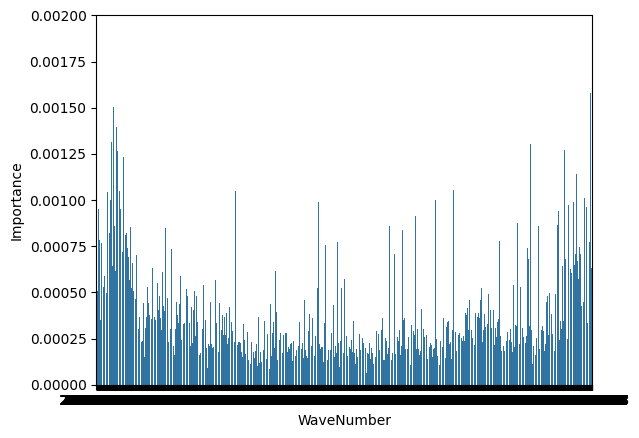

In [79]:
# Plotting with Seaborn
sns.barplot(x='WaveNumber', y='Importance', data=wavenumber_importance_df)

In [80]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=None)

: 

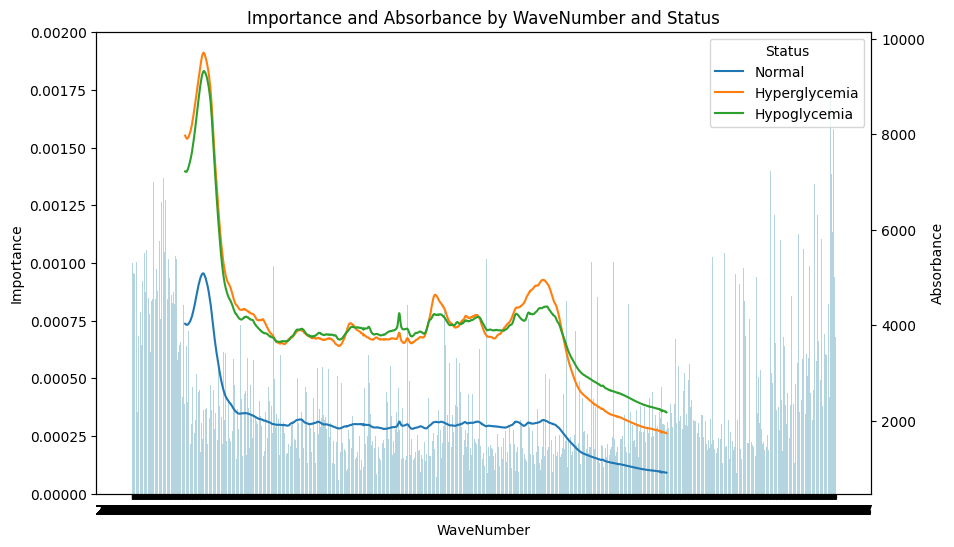

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis
sns.barplot(x='WaveNumber', y='Importance', data=wavenumber_importance_df, ax=ax1, color='lightblue')
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=None, ax=ax2)
ax2.set_ylabel('Absorbance')

# Show the plot
plt.title('Importance and Absorbance by WaveNumber and Status')
plt.show()


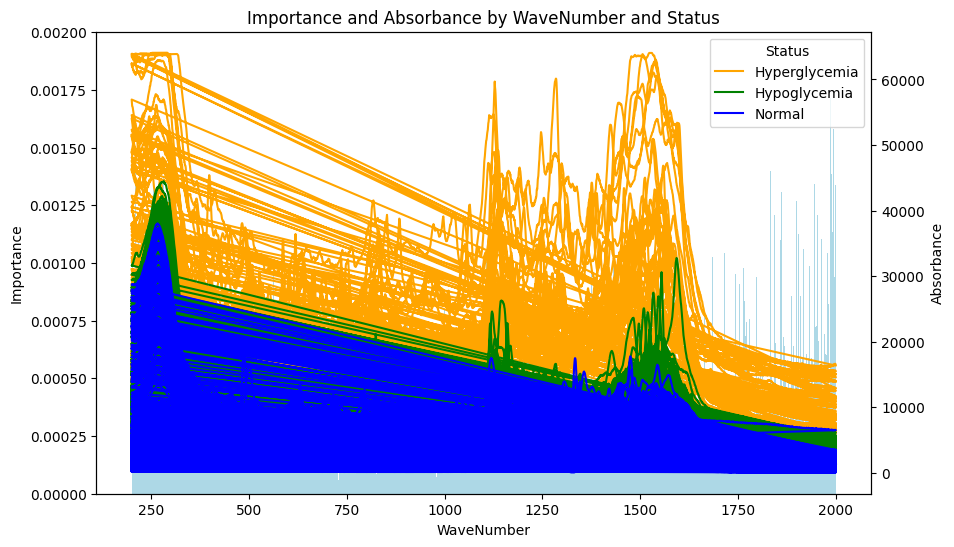

In [16]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot line plot on the second axis for each status
for status, group in df.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Absorbance')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Importance and Absorbance by WaveNumber and Status')

# Show the plot
plt.show()